In [274]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from image_extractor import preprocess_hsv, seperate_chanel

ori =  177.18588256835938


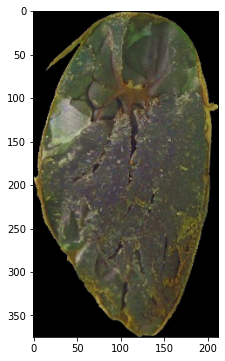

In [313]:
# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (2).JPG'
# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Brittle/image (87).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Purple/image (10).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Purple/image (100).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_White/image (99).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_White/image (72).JPG'
image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Slaty/image (84).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Slaty/image (56).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Moldered/image (3).JPG'

# plt.rcParams['figure.dpi'] = 102.46
plt.rcParams["figure.figsize"] = (6,6)

image = cv2.imread(image_dir)
image_hsv , cnt= preprocess_hsv(image)
image_rgb = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(image_rgb)
plt.show()

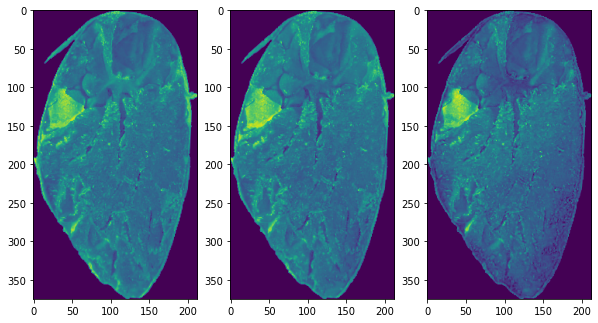

In [314]:
# h,s,v = cv2.split(image_hsv)
plt.rcParams["figure.figsize"] = (10,6)
r,g,b = seperate_chanel(image_rgb, plot=True)

In [315]:
#gamma correct

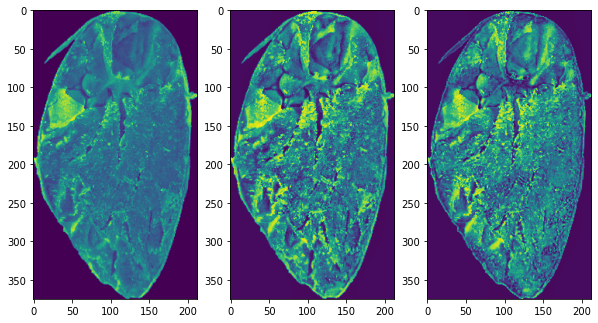

In [316]:
plt.rcParams["figure.figsize"] = (10,6)

clahe1 = cv2.createCLAHE(1, (8,8))
clahe2 = cv2.createCLAHE(6, (8,8))

clahe_r = clahe1.apply(r)
clahe_g = clahe2.apply(g)
clahe_b = clahe2.apply(b)
plt.subplot(1,3,1)
plt.imshow(clahe_r)
plt.subplot(1,3,2)
plt.imshow(clahe_g)
plt.subplot(1,3,3)
plt.imshow(clahe_b)

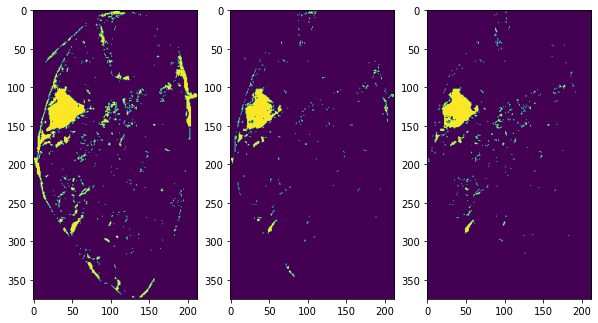

In [317]:
plt.rcParams["figure.figsize"] = (10,6)
# ret, thr = cv2.threshold(r, 180, 255, cv2.THRESH_TOZERO)
# ret, thg = cv2.threshold(g, 200, 255, cv2.THRESH_TOZERO)
# ret, thb = cv2.threshold(b, 180, 255, cv2.THRESH_TOZERO)

ret, thr = cv2.threshold(r, 120, 255, cv2.THRESH_BINARY)
ret, thg = cv2.threshold(g, 140, 255, cv2.THRESH_BINARY)
ret, thb = cv2.threshold(b, 110, 255, cv2.THRESH_BINARY)

plt.subplot(1,3,1)
plt.imshow(thr)
plt.subplot(1,3,2)
plt.imshow(thg)
plt.subplot(1,3,3)
plt.imshow(thb)

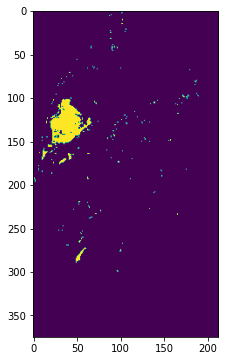

In [318]:
plt.rcParams["figure.figsize"] = (6,6)

meg = np.min([thr,thg,thb], axis=0)

plt.imshow(meg)

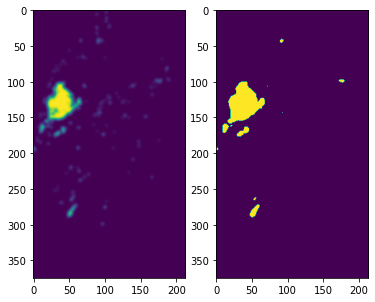

In [319]:
blur = cv2.GaussianBlur(meg, (11,11),0)
plt.subplot(1,2,1)
plt.imshow(blur)

ret, blur = cv2.threshold(blur, 40, 255, cv2.THRESH_BINARY)
plt.subplot(1,2,2)
plt.imshow(blur)
plt.show()

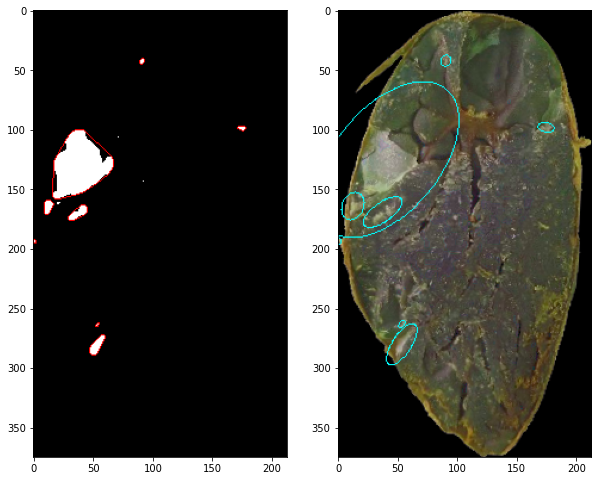

In [320]:
plt.rcParams["figure.figsize"] = (10,10)
contours, hir = cv2.findContours(blur, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
blur = cv2.cvtColor(blur, cv2.COLOR_GRAY2RGB)
for cnt in contours:
        convexHull = cv2.convexHull(cnt)
        convexhull_area = cv2.contourArea(convexHull)
        if len(cnt)<5:
                continue
        elif len(convexHull)<5:
                continue
        else:
                (eX, eY), (alX, alY), orientation = cv2.fitEllipse(convexHull)
                cv2.drawContours(blur, [convexHull], -1, (255,0,0), 1)
                cv2.ellipse(image_rgb, (int(eX), int(eY)), (int(alX), int(alY)), orientation, 0, 360, (0, 255, 255), 1)
plt.subplot(1,2,1)
plt.imshow(blur)
plt.subplot(1,2,2)
plt.imshow(image_rgb)
plt.show()